# Linear Regression & OLS - In-Class Exercises
This notebook introduces simple and multiple linear regression using Python, with a small dataset on wages, education, experience, gender, and hours worked. Students will learn to fit regressions, visualize relationships, and calculate OLS manually.

In [2]:
# ====== 1. Import Libraries ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style="whitegrid")

## 2. Create Dataset
We create a small dataset directly in Python so students can run the notebook without external files.

In [2]:
data = {
    'wage': [15,18,22,25,20,30,28,24,35,40,38,45,50,32,36],
    'education': [10,12,14,16,12,16,15,14,18,20,16,18,20,14,16],
    'experience': [1,2,5,7,3,8,6,5,10,12,9,11,14,7,8],
    'gender': ['M','F','M','F','F','M','M','F','M','F','M','F','M','F','M'],
    'hours_worked': [35,40,38,42,40,45,40,38,50,45,42,48,50,40,44]
}

df = pd.DataFrame(data)
df.head()

,wage,education,experience,gender,hours_worked
0,15,10,1,M,35
1,18,12,2,F,40
2,22,14,5,M,38
3,25,16,7,F,42
4,20,12,3,F,40


## 3. Visualize Relationships

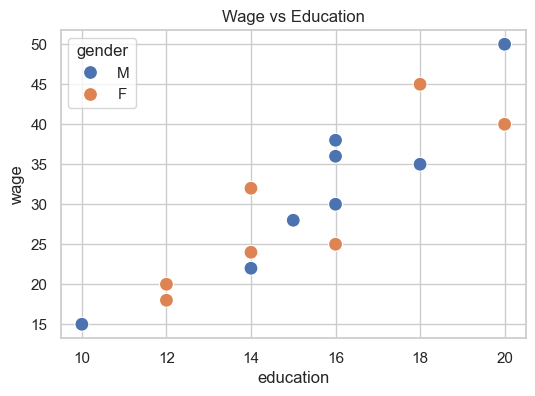

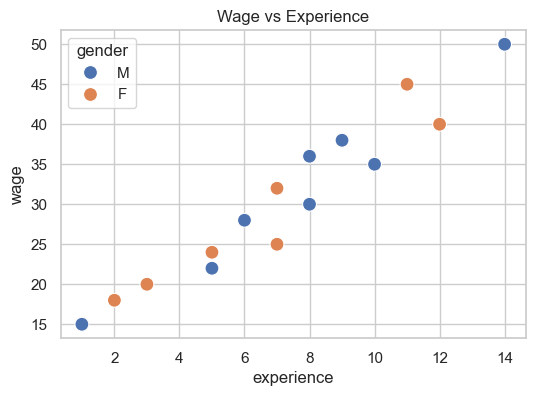

In [3]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='education', y='wage', data=df, hue='gender', s=100)
plt.title('Wage vs Education')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='experience', y='wage', data=df, hue='gender', s=100)
plt.title('Wage vs Experience')
plt.show()

## 4. Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     56.41
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           4.43e-06
Time:                        23:58:24   Log-Likelihood:                -42.994
No. Observations:                  15   AIC:                             89.99
Df Residuals:                      13   BIC:                             91.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.5975      6.647     -2.798      0.0

c:\Users\rka304\AppData\Local\anaconda3\envs\ai_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


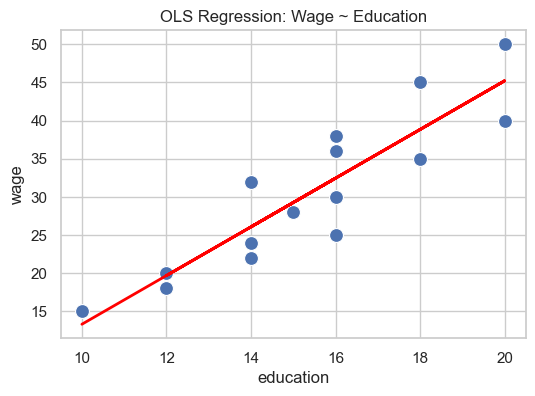

In [4]:
X = sm.add_constant(df['education'])
y = df['wage']
model = sm.OLS(y, X).fit()
print(model.summary())

plt.figure(figsize=(6,4))
sns.scatterplot(x='education', y='wage', data=df, s=100)
plt.plot(df['education'], model.predict(X), color='red', linewidth=2)
plt.title('OLS Regression: Wage ~ Education')
plt.show()

## 5. Multiple Linear Regression

In [5]:
df['gender_num'] = df['gender'].map({'M':1, 'F':0})
X_multi = df[['education','experience','gender_num','hours_worked']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     58.55
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           6.68e-07
Time:                        23:58:32   Log-Likelihood:                -31.592
No. Observations:                  15   AIC:                             73.18
Df Residuals:                      10   BIC:                             76.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.4689     13.541      2.619   

c:\Users\rka304\AppData\Local\anaconda3\envs\ai_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


## 6. Manual OLS Calculation

In [6]:
X_manual = df[['education','experience','gender_num','hours_worked']].values
X_manual = np.column_stack((np.ones(X_manual.shape[0]), X_manual))
y_manual = df['wage'].values.reshape(-1,1)
beta = np.linalg.inv(X_manual.T @ X_manual) @ (X_manual.T @ y_manual)
print('Manual OLS coefficients:', beta)

Manual OLS coefficients: [[35.46889243]
 [-3.0278955 ]
 [ 4.77857926]
 [-0.48804494]
 [ 0.17775239]]


## 7. Exercises for Students
1. Fit regression `wage ~ experience` only and plot scatter + line.
2. Apply log transformation: `log(wage)` vs `education`. Interpret coefficient.
3. Add interaction term: `education * experience` and re-run regression.
4. Compare coefficients of manual OLS vs `statsmodels` OLS.

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           9.46e-09
Time:                        23:58:44   Log-Likelihood:                -35.963
No. Observations:                  15   AIC:                             75.93
Df Residuals:                      13   BIC:                             77.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4216      1.664      6.864      0.0

c:\Users\rka304\AppData\Local\anaconda3\envs\ai_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


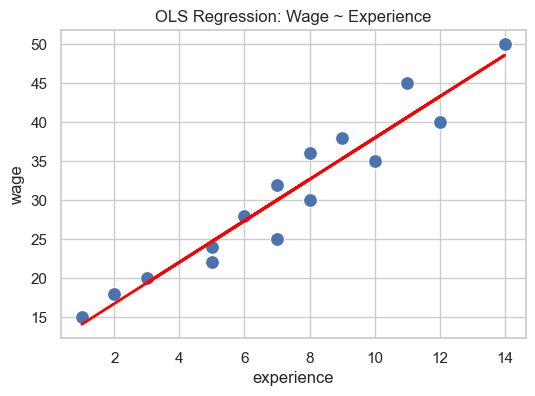

In [7]:
# 1. Fit regression `wage ~ experience` only and plot scatter + line.
X_exp = sm.add_constant(df['experience'])
model_exp = sm.OLS(y, X_exp).fit()
print(model_exp.summary())
plt.figure(figsize=(6,4))
sns.scatterplot(x='experience', y='wage', data=df, s=100)
plt.plot(df['experience'], model_exp.predict(X_exp), color='red', linewidth=2)
plt.title('OLS Regression: Wage ~ Experience')
plt.show()

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     67.23
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           1.71e-06
Time:                        00:05:22   Log-Likelihood:                 8.7204
No. Observations:                  15   AIC:                            -13.44
Df Residuals:                      13   BIC:                            -12.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6575      0.212      7.836      0.0

c:\Users\rka304\AppData\Local\anaconda3\envs\ai_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


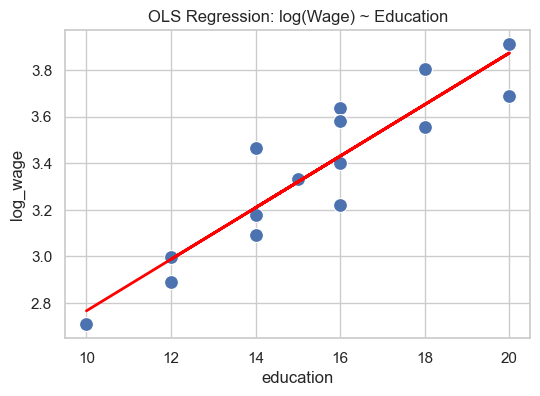

In [8]:
# 2. Apply log transformation: `log(wage)` vs `education`. Interpret coefficient.
df['log_wage'] = np.log(df['wage'])
X_log = sm.add_constant(df['education'])
model_log = sm.OLS(df['log_wage'], X_log).fit()
print(model_log.summary())
plt.figure(figsize=(6,4))
sns.scatterplot(x='education', y='log_wage', data=df, s=100)
plt.plot(df['education'], model_log.predict(X_log), color='red', linewidth=2)
plt.title('OLS Regression: log(Wage) ~ Education')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     82.15
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           8.16e-08
Time:                        00:06:22   Log-Likelihood:                -31.910
No. Observations:                  15   AIC:                             71.82
Df Residuals:                      11   BIC:                             74.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.3286 

c:\Users\rka304\AppData\Local\anaconda3\envs\ai_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


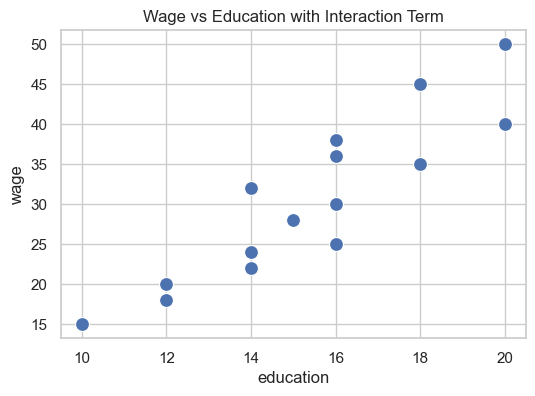

In [9]:
# 3. Add interaction term: `education * experience` and re-run regression.
df['education_experience'] = df['education'] * df['experience']
X_int = sm.add_constant(df[['education', 'experience', 'education_experience']])
model_int = sm.OLS(df['wage'], X_int).fit()
print(model_int.summary())
plt.figure(figsize=(6,4))
sns.scatterplot(x='education', y='wage', data=df, s=100)
plt.title('Wage vs Education with Interaction Term')
plt.show()

In [13]:
# 4. Compare coefficients of manual OLS vs `statsmodels` OLS.

# Manual OLS coefficients with interaction term
X_int_manual = df[['education', 'experience', 'education_experience']].values
X_int_manual = np.column_stack((np.ones(X_int_manual.shape[0]), X_int_manual))
y_manual = df['wage'].values.reshape(-1,1)
beta_int = np.linalg.inv(X_int_manual.T @ X_int_manual) @ (X_int_manual.T @ y_manual)

# Manual OLS coefficients (already calculated above)
print('Manual OLS coefficients with interaction:', beta_int.flatten())

# Statsmodels OLS coefficients (from model_int)
print('Statsmodels OLS coefficients with interaction:', model_int.params.values)

# Compare side by side
coef_names = ['const', 'education', 'experience', 'education_experience']
manual_coefs = beta_int.flatten()
statsmodels_coefs = model_int.params.values

comparison = pd.DataFrame({
    'Coefficient': coef_names,
    'Manual OLS': manual_coefs,
    'Statsmodels OLS': statsmodels_coefs
})
print(comparison)


Manual OLS coefficients with interaction: [ 4.03286270e+01 -2.88541659e+00  4.65976725e+00  9.04146276e-03]
Statsmodels OLS coefficients with interaction: [ 4.03286270e+01 -2.88541659e+00  4.65976725e+00  9.04146276e-03]
            Coefficient  Manual OLS  Statsmodels OLS
0                 const   40.328627        40.328627
1             education   -2.885417        -2.885417
2            experience    4.659767         4.659767
3  education_experience    0.009041         0.009041


In [3]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
